In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKerasTF
from sklearn.metrics import classification_report

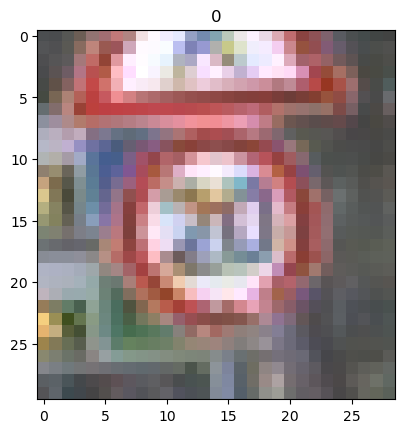

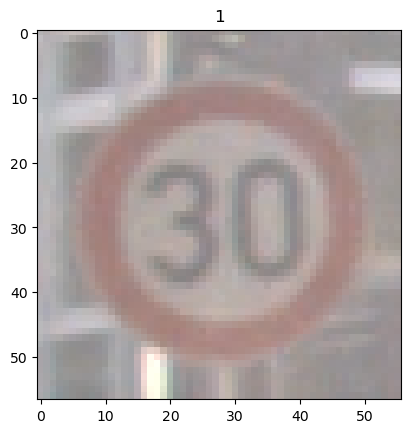

In [2]:
count = 0
for root, dirs, files in os.walk('data/Train/'):
    if files:
        count += 1
        if count > 2: break
        img = plt.imread(root + '/' + files[0])
        plt.figure()
        plt.imshow(img)
        plt.title(root.replace('data/Train/',''))

In [3]:
train_datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            rescale=1/255,
            validation_split=0.2
            )

train_generator = train_datagen.flow_from_directory(
        'data/Train',
        target_size=(30, 30),
        batch_size=32,
        subset='training'
        )

test_generator = train_datagen.flow_from_directory(
        'data/Train',
        target_size=(30, 30),
        batch_size=32,
        subset='validation'
        )

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [4]:
model = keras.models.Sequential()

model.add(layers.Conv2D(64,3, activation='relu', input_shape=(30,30,3)))

model.add(layers.Conv2D(64,3, activation='relu'))
model.add(layers.MaxPool2D(2))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(128,3, activation='relu'))
model.add(layers.MaxPool2D(2))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(128,3, activation='relu'))
model.add(layers.MaxPool2D(2))
model.add(layers.Dropout(0.1))

model.add(layers.Flatten())

model.add(layers.Dense(128))

model.add(layers.Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                    

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

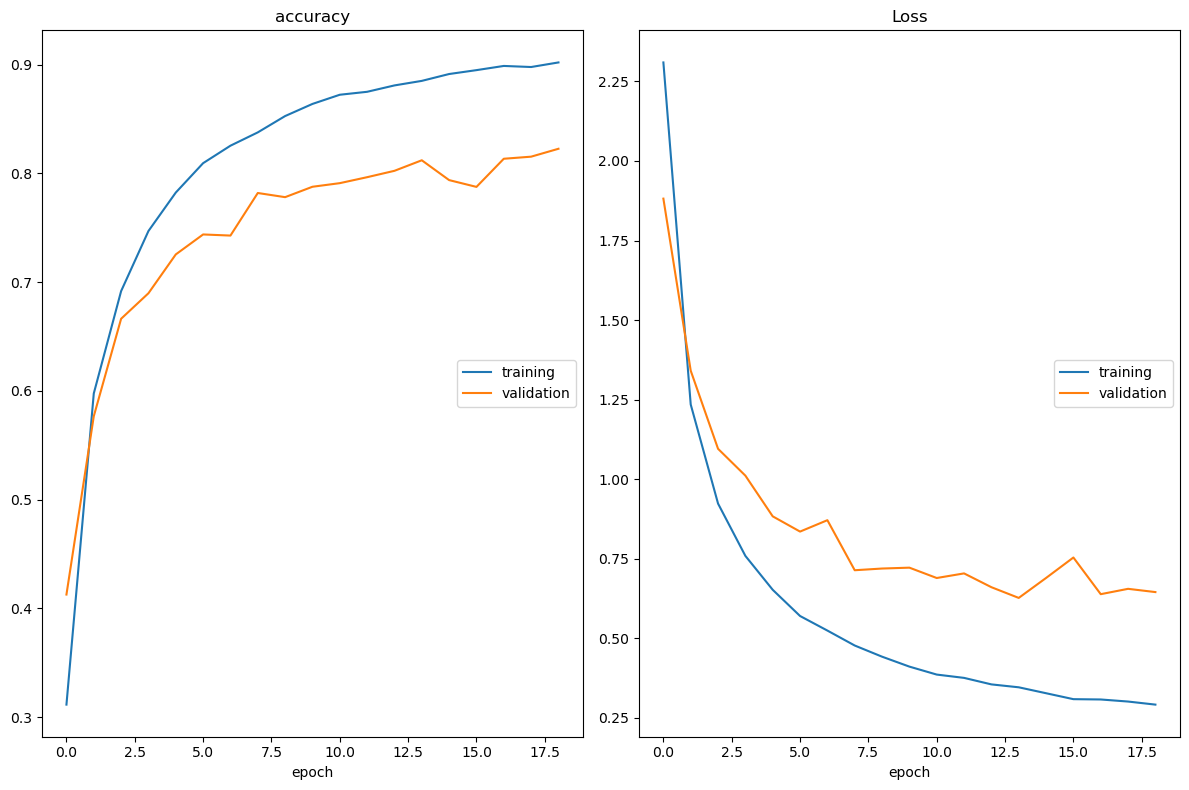

accuracy
	training         	 (min:    0.311, max:    0.902, cur:    0.902)
	validation       	 (min:    0.413, max:    0.823, cur:    0.823)
Loss
	training         	 (min:    0.291, max:    2.310, cur:    0.291)
	validation       	 (min:    0.627, max:    1.882, cur:    0.645)
981/981 [==============================] - 20s 21ms/step - loss: 0.2913 - accuracy: 0.9021 - val_loss: 0.6450 - val_accuracy: 0.8227


In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(train_generator, epochs=30, validation_data=test_generator, callbacks=[PlotLossesKerasTF(), early_stopping])